In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib import rcParams
from matplotlib import colors
from helita.sim import rh15d
import os
import xarray as xr
from scipy.integrate.quadrature import cumtrapz
from scipy.interpolate import interp1d
import astropy.constants as const
from helita.utils.utilsmath import planck, voigt
rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True
rcParams['font.family'] = 'serif'
import scipy.io
import h5py

#os.chdir('/mnt/yzhu/rh15d_mg/rh15d_mpi/5F11_kowalski2017_v5_mu0.77/output')
data = rh15d.Rh15dout("/Users/yjzhu/Desktop/Solar/Num/rh15d_mg/rh15d/5F11_pt1s_nb_300_CII/output")
data_atmos = h5py.File('/Users/yjzhu/Desktop/Solar/Num/rh15d_mg/Atmos/Kowalski2017/5F11_complete_nb_pt1s_sp.hdf5','r')
intensity = data.ray.intensity.sel(y=0)
intensity = intensity.sel(x=slice(0,150))
timet = data_atmos['timet'].value

sta_wvl = [133.4532,133.5708]
wvl_wing = 0.07
wvl_band = [[sta_wvl_ - wvl_wing,sta_wvl_ + wvl_wing] for sta_wvl_ in sta_wvl]
wvl_points = [np.linspace(sta_wvl[0] - wvl_wing,sta_wvl[0] + wvl_wing,100),np.linspace(sta_wvl[1] - wvl_wing,sta_wvl[1] + wvl_wing,100)]
intensity_band = [intensity.interp(wavelength = wvl_points_) for wvl_points_ in wvl_points]

--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mg/rh15d/5F11_pt1s_nb_300_CII/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mg/rh15d/5F11_pt1s_nb_300_CII/output/output_indata.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mg/rh15d/5F11_pt1s_nb_300_CII/output/output_ray.hdf5 file.


/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/yjzhu/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-macosx-10.9-x86_64.egg/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))
/Users/yjzhu/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-macosx-10.9-x86_64.egg/helita/sim/rh15d.py:53: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simu

In [2]:
C=np.array([[83,188,208],[84,188,207],[86,189,206],[87,189,204],[89,190,203],[91,190,202],[92,191,201],[94,191,200],[95,191,198],[97,192,197],[99,192,196],[100,193,195],[102,193,194],[103,194,193],[105,194,191],[106,195,190],[108,195,189],[110,196,188],[111,196,187],[113,197,186],[114,197,184],[116,197,183],[118,198,182],[119,198,181],[121,199,180],[122,199,178],[124,200,177],[126,200,176],[127,201,175],[129,201,174],[130,202,173],[132,202,171],[133,203,170],[135,203,169],[137,203,168],[138,204,167],[140,204,166],[141,205,164],[143,205,163],[145,206,162],[146,206,161],[148,207,160],[149,207,158],[151,208,157],[153,208,156],[154,209,155],[156,209,154],[157,209,153],[159,210,151],[160,210,150],[162,211,149],[164,211,148],[165,212,147],[167,212,146],[168,213,144],[170,213,143],[172,214,142],[173,214,141],[175,214,140],[176,215,138],[178,215,137],[180,216,136],[181,216,135],[183,217,134],[184,217,133],[185,217,133],[186,217,133],[187,217,133],[189,217,133],[190,217,133],[191,216,133],[192,216,134],[193,216,134],[194,216,134],[195,216,134],[196,216,134],[197,216,134],[199,216,134],[200,215,134],[201,215,134],[202,215,134],[203,215,134],[204,215,134],[205,215,135],[206,215,135],[207,215,135],[208,214,135],[210,214,135],[211,214,135],[212,214,135],[213,214,135],[214,214,135],[215,214,135],[216,214,135],[217,213,135],[218,213,136],[219,213,136],[221,213,136],[222,213,136],[223,213,136],[224,213,136],[225,213,136],[226,213,136],[227,212,136],[228,212,136],[229,212,136],[231,212,136],[232,212,137],[233,212,137],[234,212,137],[235,212,137],[236,211,137],[237,211,137],[238,211,137],[239,211,137],[240,211,137],[242,211,137],[243,211,137],[244,211,138],[245,210,138],[246,210,138],[247,210,138],[248,210,138],[249,210,138],[250,210,138],[251,210,138],[253,210,138],[254,209,138],[254,209,138],[254,208,137],[254,207,137],[253,206,136],[253,205,135],[253,204,134],[252,203,134],[252,202,133],[252,201,132],[252,200,131],[251,199,131],[251,198,130],[251,197,129],[250,196,129],[250,196,128],[250,195,127],[250,194,126],[249,193,126],[249,192,125],[249,191,124],[249,190,123],[248,189,123],[248,188,122],[248,187,121],[247,186,121],[247,185,120],[247,184,119],[247,183,118],[246,182,118],[246,181,117],[246,180,116],[245,179,115],[245,178,115],[245,177,114],[245,176,113],[244,175,113],[244,174,112],[244,173,111],[243,173,110],[243,172,110],[243,171,109],[243,170,108],[242,169,107],[242,168,107],[242,167,106],[242,166,105],[241,165,105],[241,164,104],[241,163,103],[240,162,102],[240,161,102],[240,160,101],[240,159,100],[239,158,99],[239,157,99],[239,156,98],[238,155,97],[238,154,97],[238,153,96],[238,152,95],[237,151,94],[237,151,94],[237,150,93],[237,149,92],[236,147,91],[236,145,90],[236,144,89],[236,142,88],[236,140,86],[236,139,85],[236,137,84],[236,135,83],[236,133,82],[236,132,81],[236,130,79],[236,128,78],[236,127,77],[236,125,76],[236,123,75],[236,121,74],[236,120,72],[236,118,71],[236,116,70],[236,115,69],[236,113,68],[236,111,67],[236,109,65],[236,108,64],[236,106,63],[236,104,62],[235,103,61],[235,101,60],[235,99,58],[235,98,57],[235,96,56],[235,94,55],[235,92,54],[235,91,53],[235,89,52],[235,87,50],[235,86,49],[235,84,48],[235,82,47],[235,80,46],[235,79,45],[235,77,43],[235,75,42],[235,74,41],[235,72,40],[235,70,39],[235,68,38],[235,67,36],[235,65,35],[235,63,34],[235,62,33],[235,60,32],[235,58,31],[235,57,29],[234,55,28],[234,53,27],[234,51,26],[234,50,25],[234,48,24],[234,46,22],[234,45,21],[234,43,20],[234,41,19],[234,39,18]])
my_rainbow = colors.ListedColormap(C/255.0)



/anaconda3/lib/python3.7/site-packages/xarray/core/computation.py:561: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


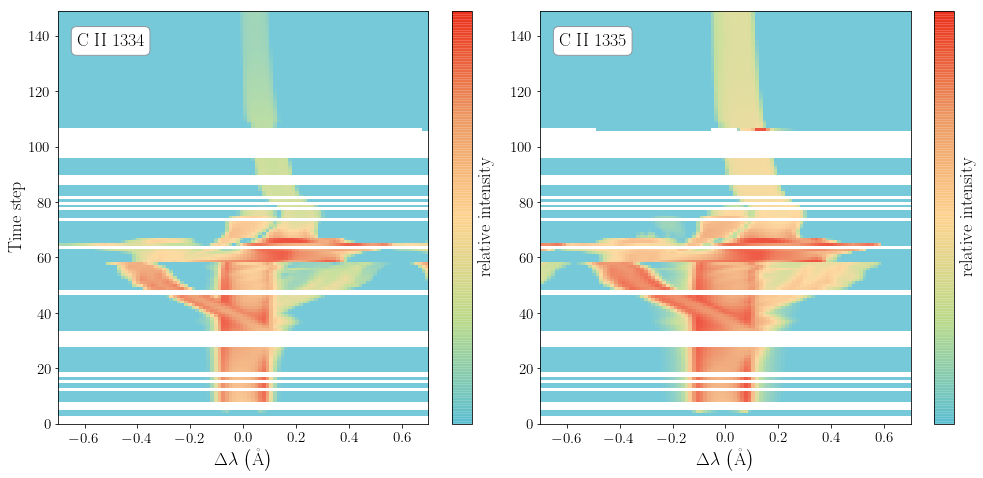

In [4]:
t_index = [0,20,54,65,72,91,210]
colors = ['#707C74','#F596AA','#E83015','#FFB11B','#90B44B','#66BAB7','#8A6BBE']
labels = [r'$t=0.0\ \mathrm{s}$',r'$t=2.6\ \mathrm{s}$',r'$t=6.3\ \mathrm{s}$',r'$t=7.4\ \mathrm{s}$',r'$t=8.28\ \mathrm{s}$',r'$t=10.20\ \mathrm{s}$',
         r'$t=23.53\ \mathrm{s}$']
intensity_grid_label = [r'$\mathrm{C\ II\ 1334}$',r'$\mathrm{C\ II\ 1335}$']
fig = plt.subplots(figsize=(15,7))

ax21 = plt.subplot2grid((6,10),(0,0),rowspan = 6,colspan = 5)
ax22 = plt.subplot2grid((6,10),(0,5),rowspan = 6,colspan = 5)
intensity_grid = [ax21,ax22]

for jj,ax_ in enumerate(intensity_grid):
    ax_.set_title(intensity_grid_label[jj],position=(0.05,0.9),loc='left',fontsize=18,bbox=dict(boxstyle="round", fc="w",ec="#91989F"))
    #ax_.axvline(0,ls = '--',color = "#C7802D")
    ax_.tick_params(labelsize=15)
    ax_.yaxis.get_offset_text().set_fontsize(15)
    

formatter = ticker.ScalarFormatter() #scientific formatting
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
ax22.set_xlabel(r'$\Delta \lambda \ \mathrm{\left(\AA\right)}$',fontsize = 18)
ax21.set_xlabel(r'$\Delta \lambda \ \mathrm{\left(\AA\right)}$',fontsize = 18)
ax21.set_ylabel(r'Time step',fontsize = 18)
#ax22.set_ylabel(r'Time step',fontsize = 18)
#ax21.yaxis.set_major_formatter(formatter)

#shift = np.array([0,0.5,1,3.5,5.5,7,8.5])*1e-7
shift = np.zeros(7)
im0 = ax21.imshow(np.log(intensity_band[0]),aspect = 'auto',origin='lower',extent=[-0.7,0.7,0,149],vmin=-17,vmax=-13,cmap = my_rainbow,alpha=0.8)
clb = plt.colorbar(im0,pad = 0.05,orientation='vertical',ax=ax21)
clb.set_ticks([])
clb.ax.set_ylabel('relative intensity',fontsize=18)
im1 = ax22.imshow(np.log(intensity_band[1]),aspect = 'auto',origin='lower',extent=[-0.7,0.7,0,149],vmin=-18,vmax=-13,cmap=my_rainbow,alpha=0.8)
clb = plt.colorbar(im1,pad = 0.05,orientation='vertical',ax=ax22)
clb.set_ticks([])
clb.ax.set_ylabel('relative intensity',fontsize=18)
plt.subplots_adjust(bottom = 0.08,left=0.10,right=0.975,top=0.9,wspace=0.25,hspace=0.5)

#plt.savefig(fname = '../figs/5F11_spectra_imshow_C.png', dpi = 300, format = 'png')
plt.savefig(fname = '../figs/5F11_spectra_imshow_C.eps', dpi = 300, format = 'eps')